In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Q1

data = pd.read_csv('userbehaviour.csv')
data.isnull().sum() # No Null Value

userid                        0
Average Screen Time           0
Average Spent on App (INR)    0
Left Review                   0
Ratings                       0
New Password Request          0
Last Visited Minutes          0
Status                        0
dtype: int64

In [3]:
# Data Info
data.head() # Checks for first 5 columns
data.describe()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   userid                      999 non-null    int64  
 1   Average Screen Time         999 non-null    float64
 2   Average Spent on App (INR)  999 non-null    float64
 3   Left Review                 999 non-null    int64  
 4   Ratings                     999 non-null    int64  
 5   New Password Request        999 non-null    int64  
 6   Last Visited Minutes        999 non-null    int64  
 7   Status                      999 non-null    object 
dtypes: float64(2), int64(5), object(1)
memory usage: 62.6+ KB


In [4]:
# Q2

screenTime = data['Average Screen Time']
print("Lowest Screen Time: ", screenTime.describe().loc[['min']])
print("Highest Screen Time: ", screenTime.describe().loc[['max']])
print("Average Screen Time: ", screenTime.describe().loc[['mean']])

Lowest Screen Time:  min    0.0
Name: Average Screen Time, dtype: float64
Highest Screen Time:  max    50.0
Name: Average Screen Time, dtype: float64
Average Screen Time:  mean    24.39039
Name: Average Screen Time, dtype: float64


In [5]:
# Q3

spent = data['Average Spent on App (INR)']
print("Lowest Amount Spent: ", spent.describe().loc[['min']])
print("Highest Amount Spent: ", spent.describe().loc[['max']])
print("Average Amount Spent: ", spent.describe().loc[['mean']])

Lowest Amount Spent:  min    0.0
Name: Average Spent on App (INR), dtype: float64
Highest Amount Spent:  max    998.0
Name: Average Spent on App (INR), dtype: float64
Average Amount Spent:  mean    424.415415
Name: Average Spent on App (INR), dtype: float64


'\n    The Installed Users have a varied screen time, irrespective of their spending on the app.\n    However, the Uninstalled Users have a low screen time and they have spent relatively less\n    most Installed Users.\n'

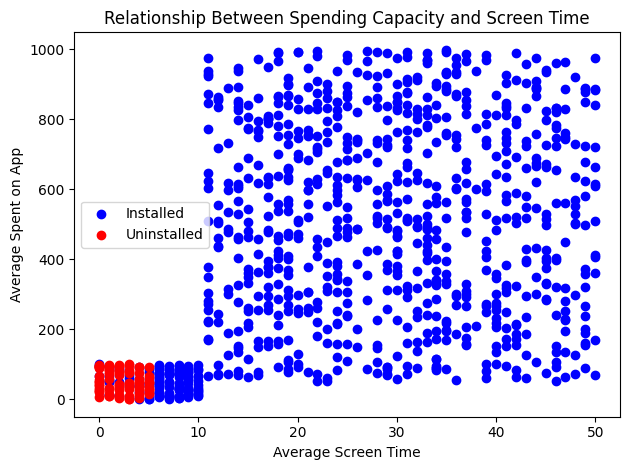

In [6]:
# Q4

inst = data[data['Status'] == 'Installed']
uninst = data[data['Status'] == 'Uninstalled']

plt.scatter(inst['Average Screen Time'], inst['Average Spent on App (INR)'],  color='blue', label='Installed')
plt.scatter(uninst['Average Screen Time'], uninst['Average Spent on App (INR)'],  color='red', label='Uninstalled')

plt.title('Relationship Between Spending Capacity and Screen Time')
plt.xlabel("Average Screen Time")
plt.ylabel("Average Spent on App")
plt.legend()
plt.tight_layout()

# Observation
"""
    The Installed Users have a varied screen time, irrespective of their spending on the app.
    However, the Uninstalled Users have a low screen time and they have spent relatively less
    most Installed Users.
"""

"\n    The Installed Users have given high ratings and their avg screen time is high as well. Their\n    ratings are high as they have spent well time on the app and are satisfied from the app's performance.\n    However, the Uninstalled Users have a low screen time and they have given a low rating to the app, meaning\n    dissatisfaction, spending less time using the app and thereby deleting it sooner.\n"

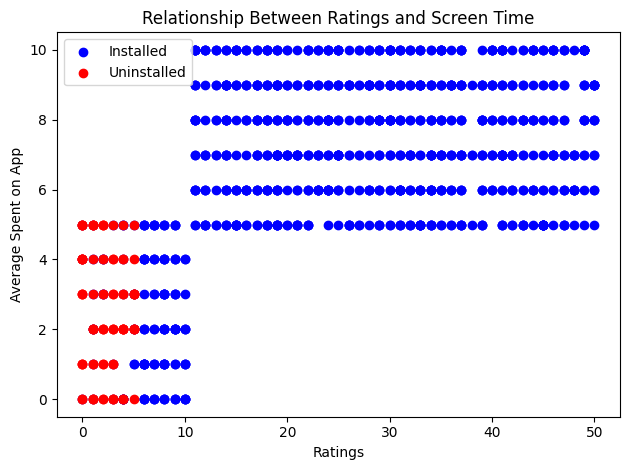

In [7]:
# Q5

plt.scatter(inst['Average Screen Time'], inst['Ratings'],  color='blue', label='Installed')
plt.scatter(uninst['Average Screen Time'], uninst['Ratings'],  color='red', label='Uninstalled')

plt.title('Relationship Between Ratings and Screen Time')
plt.xlabel("Ratings")
plt.ylabel("Average Spent on App")
plt.legend()
plt.tight_layout()

# Observation
"""
    The Installed Users have given high ratings and their avg screen time is high as well. Their
    ratings are high as they have spent well time on the app and are satisfied from the app's performance.
    However, the Uninstalled Users have a low screen time and they have given a low rating to the app, meaning
    dissatisfaction, spending less time using the app and thereby deleting it sooner.
"""

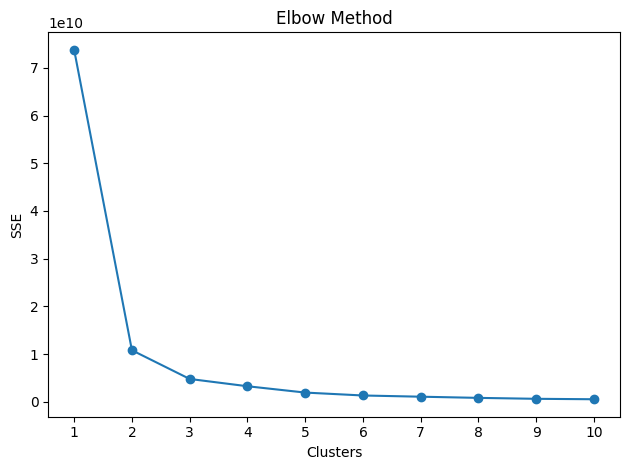

In [8]:
# Q6

# Selecting Features
features = data.drop(columns=['userid', 'Status'])

# Standardizing the data
scaler = MinMaxScaler()
for i in features.columns:
    MinMaxScaler(i)

# Finding Optimal number of clusters using Elbow Method
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=50)
    kmeans.fit(features)
    sse.append(kmeans.inertia_)

# Plotting the Elbow curve
plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Method')
plt.xticks(range(1,11))
plt.xlabel("Clusters")
plt.ylabel("SSE")
plt.tight_layout()
plt.show()

In [9]:
# Clusters = 3 as the curve becomes smooth after this value
clusters = 3

# Adding the clusters column to our data
kmeans = KMeans(n_clusters=clusters, random_state=50)
data['Cluster'] = kmeans.fit_predict(features)

data.head()

,userid,Average Screen Time,Average Spent on App (INR),Left Review,Ratings,New Password Request,Last Visited Minutes,Status,Cluster
0,1001,17.0,634.0,1,9,7,2990,Installed,0
1,1002,0.0,54.0,0,4,8,24008,Uninstalled,2
2,1003,37.0,207.0,0,8,5,971,Installed,0
3,1004,32.0,445.0,1,6,2,799,Installed,0
4,1005,45.0,427.0,1,5,6,3668,Installed,0


In [10]:
# Analyzing the clusters
data['Cluster'].value_counts()

# We get three segments/clusters

Cluster
0    910
1     45
2     44
Name: count, dtype: int64

"\n    I took useful features from data that will help to identify patterns. Then, I scaled them\n    to ensure they are in one scale and no single feature dominates. \n    Afterwards, I used the elbow method for k-value from 1 to 10, to get the optimal number of clusters,\n    which comes out to be 3.\n    Then, I used k=3 to predict the which data row belongs to which cluster, that is saved in the 'Cluster'\n    column.\n    Finally, I plotted the clusters with colors showing the user behavior segments based on the features.\n    Green: This shows the users that were 'Retained' i.e., who didn't uninstall the app.\n    Red: This shows the users that might uninstall soon.\n    Blue: The lost users, or the ones that have uninstalled long ago.\n"

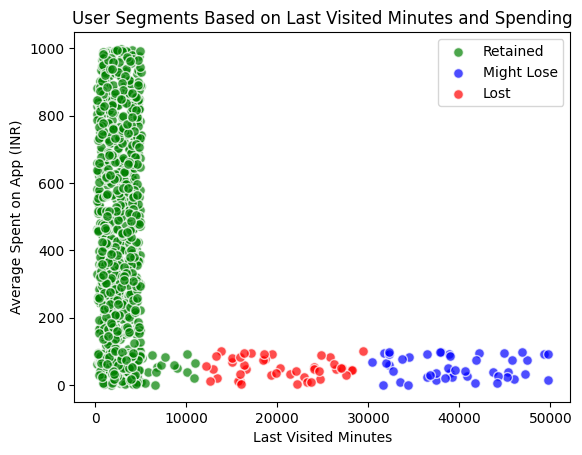

In [11]:
# Q7
# Plotting the clusters

colors = ['green' if cluster == 0 else 'blue' if cluster == 1 else 'red' for cluster in data['Cluster']]

# Scatter plot for each cluster
for cluster, color in zip([0, 1, 2], ['green', 'blue', 'red']):
    cluster_data = data[data['Cluster'] == cluster]
    plt.scatter(cluster_data['Last Visited Minutes'], cluster_data['Average Spent on App (INR)'], 
                c=color, s=50, alpha=0.7, edgecolors='w')


plt.title('User Segments Based on Last Visited Minutes and Spending')
plt.xlabel('Last Visited Minutes')
plt.ylabel('Average Spent on App (INR)')
plt.legend(["Retained", "Might Lose", "Lost"])

# Q8
"""
    I took useful features from data that will help to identify patterns. Then, I scaled them
    to ensure they are in one scale and no single feature dominates. 
    Afterwards, I used the elbow method for k-value from 1 to 10, to get the optimal number of clusters,
    which comes out to be 3.
    Then, I used k=3 to predict the which data row belongs to which cluster, that is saved in the 'Cluster'
    column.
    Finally, I plotted the clusters with colors showing the user behavior segments based on the features.
    Green: This shows the users that were 'Retained' i.e., who didn't uninstall the app.
    Red: This shows the users that might uninstall soon.
    Blue: The lost users, or the ones that have uninstalled long ago.
"""

"\n    Average Screen Time: strong relation with Ratings & Avg. Spent on App, bad with Last Visited Minutes\n    which shows the more users used the map, the more they spent on it and gave good reviews\n    \n    Avg. Spent on App: strong relation with Ratings & Avg. Screen Time and bad with Last Visited Minutes\n    shows the more they spent on app, the more they used it, left good reviews, and kept using it.\n    \n    Left Review: No such relation with most features. \n    \n    Ratings: strong relation with Avg. Screen Time & Amount Spent, bad with Last Visited Minutes, \n    showing users rated app good who spent more time & money on app, while others rated it low\n    who didn't like it and uninstalled soon.\n    \n    Password Request: strong relation with Last Visited Minutes, less with Ratings, Avg. Spent\n    & Avg. Screen Time, showing users who changed password more didn't use the app much and disliked it.\n    \n    Last Visited Mins: strong relation with Password Requests

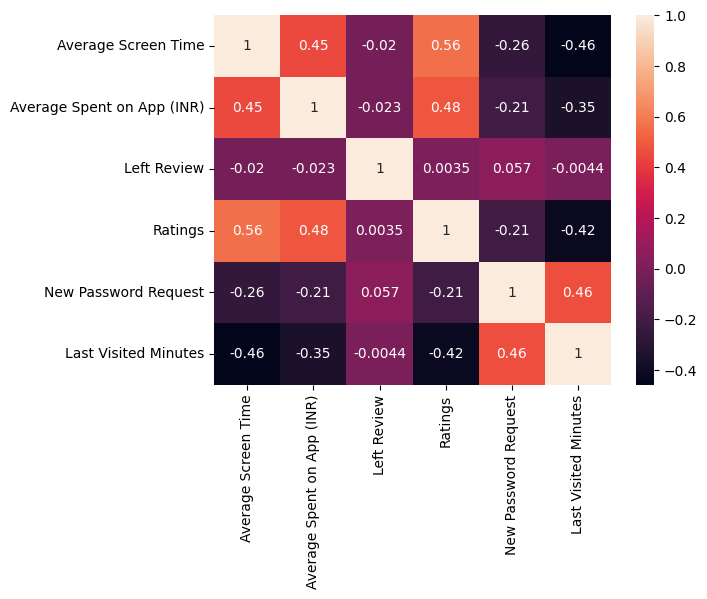

In [12]:
# Q9

# Correlation Matrix
corrM = features.corr()
ax = sns.heatmap(corrM, annot=True)

# Observation
"""
    Average Screen Time: strong relation with Ratings & Avg. Spent on App, bad with Last Visited Minutes
    which shows the more users used the map, the more they spent on it and gave good reviews
    
    Avg. Spent on App: strong relation with Ratings & Avg. Screen Time and bad with Last Visited Minutes
    shows the more they spent on app, the more they used it, left good reviews, and kept using it.
    
    Left Review: No such relation with most features. 
    
    Ratings: strong relation with Avg. Screen Time & Amount Spent, bad with Last Visited Minutes, 
    showing users rated app good who spent more time & money on app, while others rated it low
    who didn't like it and uninstalled soon.
    
    Password Request: strong relation with Last Visited Minutes, less with Ratings, Avg. Spent
    & Avg. Screen Time, showing users who changed password more didn't use the app much and disliked it.
    
    Last Visited Mins: strong relation with Password Requests, less with Ratings, Avg. Spent
    & Avg. Screen Time, showing users who changed password more didn't use the app much and disliked it.
"""

In [13]:
# Q10

# Selecting Features
features = data.drop(columns=['userid', 'Status'])

# Anomaly Detection using Isolation Forest
iso = IsolationForest(contamination=0.1, random_state=50)
data['Anomaly'] = iso.fit_predict(features)

# Printing the Anomaly Data
anomaly=data.loc[data['Anomaly']==-1]
anomaly_index=list(anomaly.index)
anomaly

,userid,Average Screen Time,Average Spent on App (INR),Left Review,Ratings,New Password Request,Last Visited Minutes,Status,Cluster,Anomaly
1,1002,0.0,54.0,0,4,8,24008,Uninstalled,2,-1
38,1039,1.0,97.0,0,1,7,37959,Uninstalled,1,-1
43,1044,4.0,93.0,0,2,8,49334,Uninstalled,1,-1
46,1047,3.0,34.0,1,5,6,39016,Uninstalled,1,-1
61,1062,5.0,67.0,0,2,6,30435,Uninstalled,1,-1
...,...,...,...,...,...,...,...,...,...,...
947,1948,2.0,3.0,1,3,14,16067,Uninstalled,2,-1
949,1950,0.0,95.0,0,1,10,16324,Uninstalled,2,-1
956,1957,2.0,31.0,0,5,7,15904,Uninstalled,2,-1
978,1979,1.0,73.0,0,3,13,45734,Uninstalled,1,-1
